In [13]:
from cccn.noise import CrossCorrelation
from cccn.post_func import stack_all

In [14]:
cc = CrossCorrelation()
cc.clean()
for path in ['dataSAC/2008.010', 'dataSAC/2008.011']:
    cc.para.datapath=path
    cc.para.suffix = 'sac'
    cc.para.target_dt = 1
    cc.para.nnode = 1
    cc.read_sac()
    cc.perwhiten()
    cc.docc()

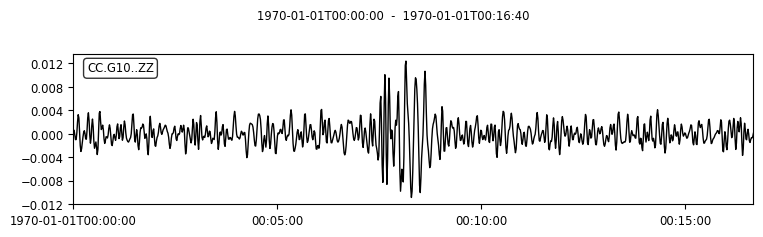

In [15]:
st = stack_all('COR_CC.G01_CC.G10_ZZ.h5')
st.plot(show=False)